In [1]:
import matplotlib.pyplot as plt
from pandas import read_excel
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import numpy.linalg as nlg
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
mpl.style.use('seaborn')
plt.rcParams['font.sans-serif'] = ['SimSun'] # 中文字体设置
plt.rcParams['axes.unicode_minus'] = False #解决保存图像 是负号 显示为方块的问题
sns.set(font='SimSun',font_scale=1.5) #解决 Seaborn 中文显示问题并调整字体大小

In [2]:
namesheet = read_excel('二十支股票重要参数.xlsx',sheet_name=0)
namelist = namesheet.iloc[:,1]
stock_data=read_excel('二十支股票重要参数.xlsx',sheet_name=1,parse_dates=['时间'],index_col='时间')
# stock_data.drop('交易日期', axis=1, inplace=True) #删除第二列’交易日期‘
stock_data.index.name='时间' #日期为索引列
#将数据按日期这一列排序（保证后续计算收益率的正确性）
stock_data=stock_data.sort_values(by='时间')
# 打印数据的前5行
print(stock_data.head())
print(stock_data.info())

              收盘价    开盘价    最高价    最低价    涨跌幅    涨跌额     成交量         成交额  \
时间                                                                         
2018-10-16  67.77  56.06  67.77  56.06  46.37  21.47    4199    29448511   
2018-10-17  74.80  74.80  74.80  74.80  10.37   7.03    1865    14420083   
2018-10-18  78.47  82.53  82.53  70.88   4.91   3.67  557185  4493959168   
2018-10-19  86.57  77.00  86.57  76.90  10.32   8.10  353192  3011157568   
2018-10-22  95.48  91.50  95.48  89.51  10.29   8.91  176858  1689793616   

               振幅    换手率  
时间                        
2018-10-16  25.29   0.35  
2018-10-17   0.00   0.15  
2018-10-18  15.57  45.82  
2018-10-19  12.32  29.05  
2018-10-22   6.90  14.54  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 596 entries, 2018-10-16 to 2021-03-26
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   收盘价     596 non-null    float64
 1   开盘价     596 non-null    float64
 2   最

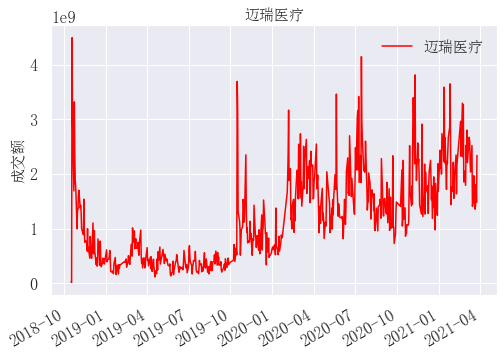

In [3]:
stock_data['成交额'].plot(grid=True,color='red',label=namelist[0])
plt.title(namelist[0], fontsize='15')
plt.ylabel('成交额', fontsize='15')
plt.xlabel('', fontsize='8')
plt.legend(loc='best',fontsize='small')
plt.show()

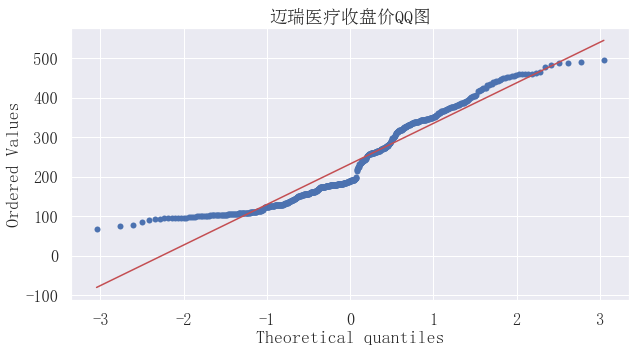

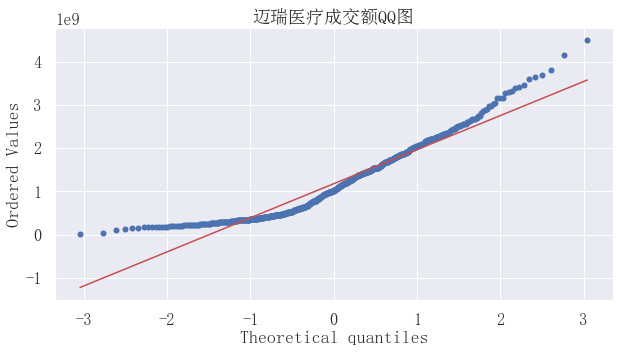

In [52]:
import scipy.stats as stats
fig=plt.figure(figsize=[10,5])
stats.probplot(stock_data['收盘价'], dist="norm",plot=plt)
plt.title('迈瑞医疗收盘价QQ图')
plt.savefig('img/迈瑞医疗收盘价QQ图.png',bbox_inches='tight',dpi=600,pad_inches=0.0)

fig=plt.figure(figsize=[10,5])
stats.probplot(stock_data['成交额'], dist="norm",plot=plt)
plt.title('迈瑞医疗成交额QQ图')
plt.savefig('img/迈瑞医疗成交额QQ图.png',bbox_inches='tight',dpi=600,pad_inches=0.0)

<Figure size 720x3600 with 0 Axes>

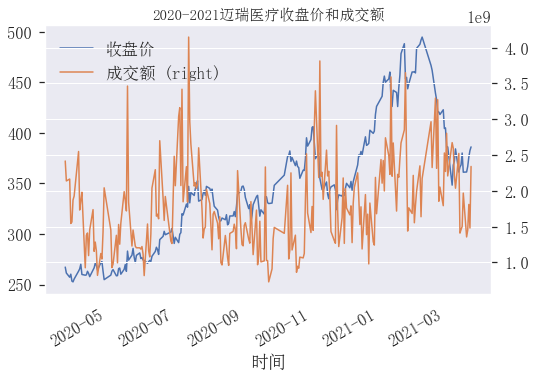

In [75]:
data=stock_data.loc['2020-03-26':'2021-03-26']  #获取某个时间段内的时间序列数据
fig=plt.figure(figsize=[10,50])
data[['收盘价','成交额']].plot(secondary_y='成交额',fig=fig)
plt.title('2020-2021迈瑞医疗收盘价和成交额', fontsize='15')
plt.savefig('img/一年内迈瑞医疗收盘价成交额变化.png',bbox_inches='tight',dpi=600,pad_inches=0.0)
plt.show()

F:\anaconda\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


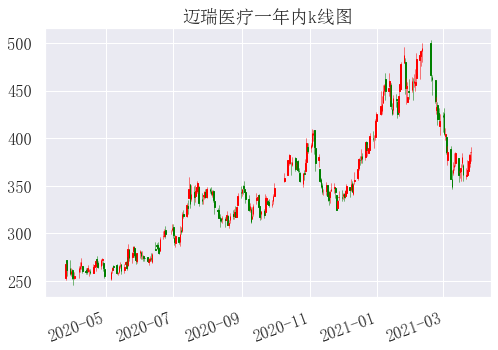

In [5]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY, date2num


# 定义绘制K线图的函数
def pandas_candlestick_ohlc(stock_data,title=None,otherseries=None):
    # 设置绘图参数，主要是坐标轴
    mondays = WeekdayLocator(MONDAY)
    alldays = DayLocator()
    dayFormatter = DateFormatter('%d')

    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    # if stock_data.index[-1] - stock_data.index[0] < pd.Timedelta('730 days'):
    #     weekFormatter = DateFormatter('%b %d')
    #     ax.xaxis.set_major_locator(mondays)
    #     ax.xaxis.set_minor_locator(alldays)
    # else:
    #     weekFormatter = DateFormatter('%b %d, %Y')
    # ax.xaxis.set_major_formatter(weekFormatter)
    ax.grid(True)

    # 创建K线图
    stock_array = np.array(stock_data.reset_index()[['时间', '开盘价', '最高价', '最低价', '收盘价']])
    stock_array[:, 0] = date2num(stock_array[:, 0])
    candlestick_ohlc(ax, stock_array, colorup="red", colordown="green", width=0.6)

    # 可同时绘制其他折线图
    if otherseries is not None:
        for each in otherseries:
            plt.plot(stock_data[each], label=each)
        plt.legend()

    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=20, horizontalalignment='right')
    plt.title(title)
    plt.savefig('img/%s.png'%title,bbox_inches='tight',dpi=600,pad_inches=0.0)
    plt.show()



data = stock_data.loc['2020-03-26':'2021-03-26']  # 获取某个时间段内的时间序列数据
pandas_candlestick_ohlc(data,title='迈瑞医疗一年内k线图')

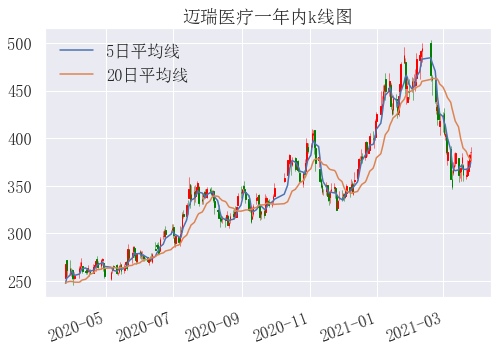

In [6]:
stock_data['5日平均线']=np.round(stock_data['收盘价'].rolling(window=5,center=False).mean(),2)
stock_data['20日平均线']=np.round(stock_data['收盘价'].rolling(window=20,center=False).mean(),2)
data=stock_data.loc['2020-03-26':'2021-03-26']  #获取某个时间段内的时间序列数据
pandas_candlestick_ohlc(data,otherseries=['5日平均线','20日平均线'],title='迈瑞医疗一年内k线图')

[[ 1.00000000e+00  9.89675175e-01  9.95838231e-01  9.97006526e-01
   4.56704112e-02  5.33593982e-02 -1.64793763e-01  3.51467674e-01
   3.06577785e-01 -1.65348557e-01]
 [ 9.89675175e-01  1.00000000e+00  9.96156002e-01  9.94616743e-01
  -8.66333846e-02 -8.14585899e-02 -1.51144877e-01  3.68716686e-01
   3.24967356e-01 -1.51718556e-01]
 [ 9.95838231e-01  9.96156002e-01  1.00000000e+00  9.96781213e-01
  -1.98285547e-02 -1.56786480e-02 -1.32416105e-01  3.85861302e-01
   3.53407380e-01 -1.32987028e-01]
 [ 9.97006526e-01  9.94616743e-01  9.96781213e-01  1.00000000e+00
  -7.81314950e-03  7.86532169e-04 -1.81093094e-01  3.38523453e-01
   2.79185919e-01 -1.81636987e-01]
 [ 4.56704112e-02 -8.66333846e-02 -1.98285547e-02 -7.81314950e-03
   1.00000000e+00  9.84226574e-01 -1.77421024e-02 -5.18846480e-02
  -5.10675247e-02 -1.74435986e-02]
 [ 5.33593982e-02 -8.14585899e-02 -1.56786480e-02  7.86532169e-04
   9.84226574e-01  1.00000000e+00 -7.34645249e-02 -1.04561878e-01
  -9.95637413e-02 -7.32337392e-02

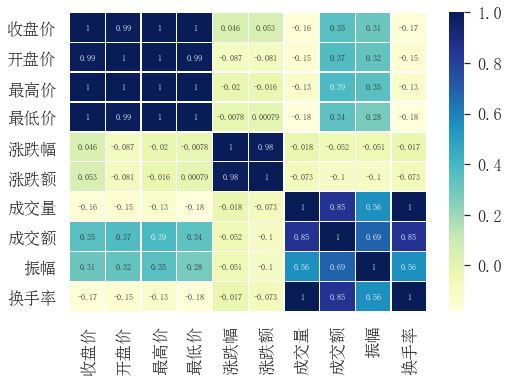

In [7]:
data=stock_data.loc['2020-03-26':'2021-03-26']  #获取某个时间段内的时间序列数据
cov=np.corrcoef(data[['收盘价','开盘价','最高价','最低价','涨跌幅','涨跌额','成交量','成交额','振幅','换手率']].T)
print(cov)
# img=plt.matshow(cov)
# plt.colorbar(img,ticks=[-1,0,1])
# plt.show()
data = data[['收盘价','开盘价','最高价','最低价','涨跌幅','涨跌额','成交量','成交额','振幅','换手率']]
cov = data.corr()
print(cov)
sns.heatmap(cov,
            annot=True,
            cmap="YlGnBu",
            linewidths=0.3,
            annot_kws={"size": 8})

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [8]:
from tqdm import tqdm
StockPrices = pd.DataFrame()
for i in tqdm(range(20)):
    stock_data_each=read_excel('二十支股票重要参数.xlsx',sheet_name=i+1,parse_dates=['时间'],index_col='时间')
    # stock_data.drop('交易日期', axis=1, inplace=True) #删除第二列’交易日期‘
    stock_data_each.index.name='时间' #日期为索引列
    #将数据按日期这一列排序（保证后续计算收益率的正确性）
    stock_data_each=stock_data_each.sort_values(by='时间')
    data_each=stock_data_each.loc['2020-03-26':'2021-03-26']
    StockPrices[namelist[i]]=data_each['收盘价']
# print(StockPrices)

100%|██████████| 20/20 [02:20<00:00,  7.03s/it]


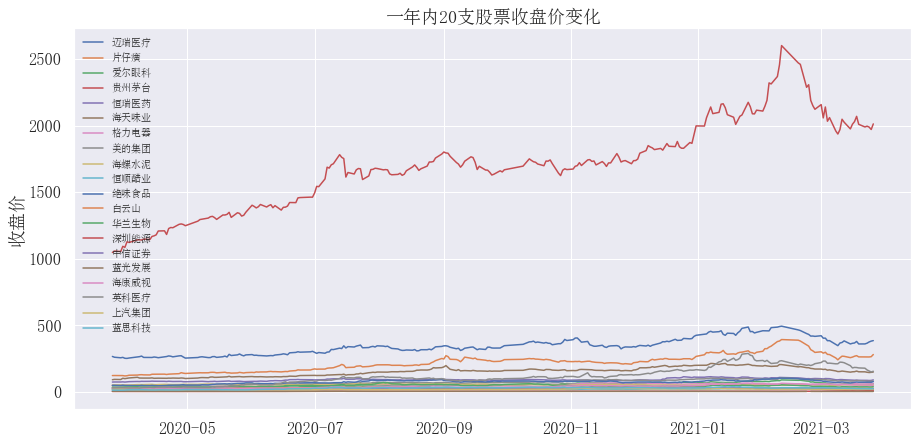

In [9]:
fig=plt.figure(figsize=[15,7])
ax=fig.add_subplot(1,1,1)
ax.plot(StockPrices)
plt.legend(namelist,fontsize=10)
plt.ylabel('收盘价')
plt.title('一年内20支股票收盘价变化')
# plt.plot(StockPrices)
plt.savefig('img/一年内20支股票收盘价变化.png',bbox_inches='tight',dpi=600,pad_inches=0.0)
plt.show()

In [10]:
# 计算每日收益率，并丢弃缺失值
StockReturns = StockPrices.pct_change().dropna()
# 打印前5行数据
print(StockReturns.head())


                迈瑞医疗       片仔癀      爱尔眼科      贵州茅台      恒瑞医药      海天味业  \
时间                                                                       
2020-03-27 -0.021969  0.001697  0.000673  0.010096  0.006796  0.028238   
2020-03-30 -0.015842 -0.006213 -0.017479 -0.003307 -0.002118 -0.011785   
2020-03-31  0.011703  0.002517  0.032501  0.036968  0.014723  0.101043   
2020-04-01 -0.026403 -0.021137 -0.011928 -0.007313 -0.022092 -0.027173   
2020-04-02 -0.002882  0.011665  0.015091  0.038675  0.020585  0.021372   

                格力电器      美的集团      海螺水泥      恒顺醋业      绝味食品       白云山  \
时间                                                                       
2020-03-27 -0.005135  0.009494  0.028473 -0.002045 -0.001391 -0.009646   
2020-03-30 -0.009728 -0.028422  0.000372 -0.010929 -0.030833  0.006494   
2020-03-31  0.002406  0.007098 -0.013744  0.045580  0.051314 -0.003548   
2020-04-01 -0.004200  0.003417 -0.005650 -0.021797 -0.041976 -0.032049   
2020-04-02  0.006226  0.008089 -0.001

In [12]:
StockPrices_ALL = pd.DataFrame()

In [13]:
for i in tqdm(range(20)):
    stock_data_each=read_excel('二十支股票重要参数.xlsx',sheet_name=i+1,parse_dates=['时间'],index_col='时间')
    # stock_data.drop('交易日期', axis=1, inplace=True) #删除第二列’交易日期‘
    stock_data_each.index.name='时间' #日期为索引列
    #将数据按日期这一列排序（保证后续计算收益率的正确性）
    stock_data_each=stock_data_each.sort_values(by='时间')
    data_each=stock_data_each.loc['2020-03-26':'2021-03-26']
    data_each_mean = data_each.mean()
    StockPrices_ALL[namelist[i]]=data_each_mean
StockPrices_ALL=StockPrices_ALL.T

100%|██████████| 20/20 [03:08<00:00,  9.44s/it]


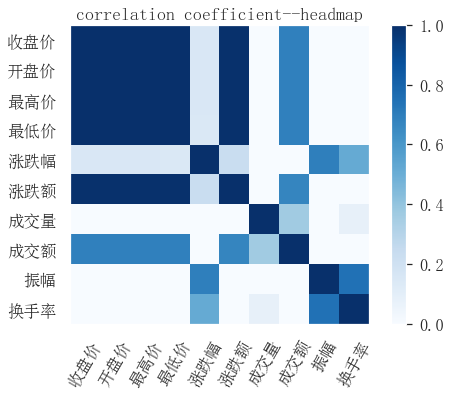

In [99]:
from matplotlib import cm
from factor_analyzer import *
from scipy.stats import bartlett
import math
import numpy.linalg as nlg
# print(StockPrices_ALL)
df2=StockPrices_ALL.copy()
df2= (df2 - df2.mean()) / df2.std()
df2_corr=df2.corr()
# print("\n相关系数:\n",df2_corr)

#热力图
cmap = cm.Blues
# cmap = cm.hot_r
fig=plt.figure()
ax=fig.add_subplot(111)
map = ax.imshow(df2_corr, interpolation='nearest', cmap=cmap, vmin=0, vmax=1)
plt.title('correlation coefficient--headmap')
ax.set_yticks(range(len(df2_corr.columns)))
ax.set_yticklabels(df2_corr.columns)
ax.set_xticks(range(len(df2_corr)))
ax.set_xticklabels(df2_corr.columns,rotation=60)
plt.grid(False)
plt.colorbar(map)
plt.savefig('img/correlation coefficient--headmap.png',bbox_inches='tight',dpi=600,pad_inches=0.0)
plt.show()

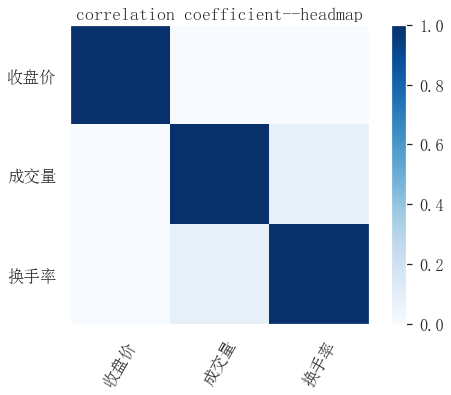

In [89]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
# KMO测度
kmo_all, kmo_model = calculate_kmo(df2)
# 巴特利特球形检验
chi_square_value, p_value = calculate_bartlett_sphericity(df2)

print('KMO测度:{},巴特利特球形检验:{}'.format(kmo_model,p_value))
KMO_bartlett=pd.DataFrame(['kmo_model','p_value'])
KMO_bartlett['Date']=[kmo_model,p_value]
KMO_bartlett.to_excel('kmo_model_p_value.xlsx')

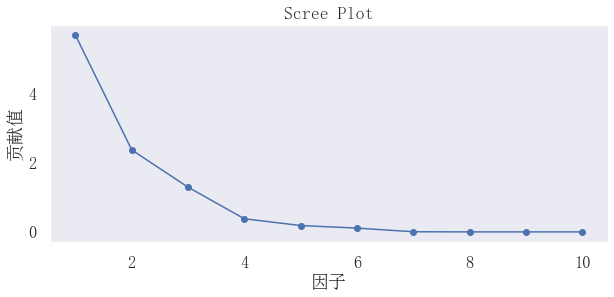

In [106]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(20, rotation=None)
fa.fit(df2)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
# Create scree plot using matplotlib
plt.figure(figsize=[10,4])
plt.scatter(range(1,df2.shape[1]+1),ev)
plt.plot(range(1,df2.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('因子')
plt.ylabel('贡献值')
plt.grid()
plt.savefig('img/ScreePlot.png',bbox_inches='tight',dpi=600,pad_inches=0.0)

plt.show()

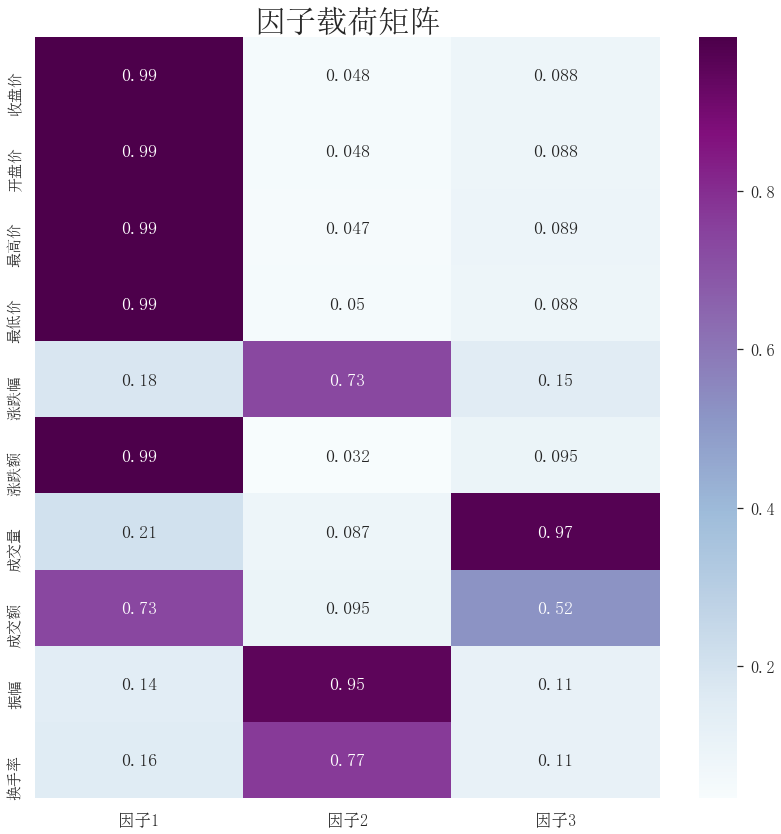

In [102]:
fa = FactorAnalyzer(3, rotation="varimax")
fa.fit(df2)
df_cm = pd.DataFrame(np.abs(fa.loadings_), index=df2.columns)
plt.figure(figsize = (14,14))
ax = sns.heatmap(df_cm, annot=True, cmap="BuPu")
# 设置y轴的字体的大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title('因子载荷矩阵', fontsize='xx-large')
ax.set_xticklabels(['因子1','因子2','因子3','因子4'])
plt.savefig('img/因子载荷矩阵.png',bbox_inches='tight',dpi=600,pad_inches=0.0)

# Set y-axis label
# plt.ylabel('Sepal Width', fontsize='xx-large')
# plt.savefig('factorAnalysis.png', dpi=500)

In [103]:
print("提取出的公因子经过旋转后的方差贡献情况:\n",fa.loadings_)
print("各因子的累积方差贡献率:\n", fa.get_communalities())
print("各因子的方差贡献率:\n", fa.get_factor_variance())
print("因子得分系数矩阵:\n",fa.transform(df2))

提取出的公因子经过旋转后的方差贡献情况:
 [[ 0.99415569 -0.04825761 -0.08839145]
 [ 0.99414393 -0.04844983 -0.088378  ]
 [ 0.99417996 -0.04680735 -0.08893454]
 [ 0.99412763 -0.04992559 -0.08770878]
 [ 0.17942736  0.73399741 -0.15138843]
 [ 0.99157337  0.03244072 -0.09483967]
 [-0.2087248  -0.08691536  0.97260401]
 [ 0.73497103 -0.0953786   0.52425088]
 [-0.14499321  0.95480332 -0.11278523]
 [-0.1558139   0.77145325  0.1149154 ]]
各因子的累积方差贡献率:
 [0.99848738 0.99848022 0.99849408 0.99847514 0.59386482 0.99326472
 0.99707889 0.82411849 0.94539292 0.63262364]
各因子的方差贡献率:
 (array([5.59781263, 2.07260513, 1.30986254]), array([0.55978126, 0.20726051, 0.13098625]), array([0.55978126, 0.76704178, 0.89802803]))
因子得分系数矩阵:
 [[ 0.48303357  0.19342916 -0.35601399]
 [ 0.19344019  0.92394995 -0.79254252]
 [-0.29062825  0.17507152 -0.22163741]
 [ 4.24008175 -0.42277692 -0.0701541 ]
 [-0.26712039 -0.65625833 -0.38380129]
 [-0.14972233 -1.14619374 -1.0285615 ]
 [-0.27239908 -0.75910961  0.44761035]
 [-0.23712093 -0.2597613  -0

In [118]:
pd.DataFrame(fa.get_factor_variance()).to_excel('因子分析贡献率.xlsx')

In [ ]:
var = fa.get_factor_variance()
for i in range(0,3):
    print(var[i])
#公因子方差 ， 特殊因子方差，因子的方差贡献度 ，反映公共因子对所有变量的贡献
fa.get_communalities()
#计算各个企业的因子得分
fa_t_score = np.dot(np.mat(df2), np.mat(fa.loadings_))
print("\n每个股票的因子得分：\n",pd.DataFrame(fa_t_score))
#综合得分(加权计算）
weight = var[1]     #计算每个因子的权重
e , ev = nlg.eig(df2_corr)
fa_t_score_final = (np.dot(fa_t_score, weight) / e.sum()).real

In [104]:
print(fa_t_score_final)
End_scores=pd.DataFrame(namelist)
# fa_t_score = pd.DataFrame(fa_t_score_final.T)
# fa_t_score.columns = ['综合得分']
# print(fa_t_score)
End_scores[['因子1得分','因子2得分','因子3得分']]=pd.DataFrame(fa_t_score)
End_scores['综合得分']=fa_t_score_final.T
End_scores=End_scores.sort_values(by='综合得分',ascending=False)
print(End_scores)
End_scores.to_excel('综合得分.xlsx')

[[ 0.12299228  0.05374643 -0.06376478  1.24312446 -0.05318468 -0.03885937
  -0.06017706 -0.04742067 -0.11702631 -0.13646773 -0.09038959 -0.18250694
  -0.08367096 -0.13713274 -0.04114824 -0.20720331 -0.06077633  0.1006496
  -0.14889496 -0.05188909]]
      名称      因子1得分     因子2得分     因子3得分      综合得分
3   贵州茅台  23.283934 -2.165717 -1.174153  1.243124
0   迈瑞医疗   2.397583  0.093746 -1.004908  0.122992
17  英科医疗  -0.738320  7.646139 -1.259287  0.100650
1    片仔癀   1.040686  0.628890 -1.339349  0.053746
5   海天味业  -0.159414 -0.688357 -1.196212 -0.038859
14  中信证券  -1.354929 -1.243966  4.617330 -0.041148
7   美的集团  -0.614880 -0.741396  0.180582 -0.047421
19  蓝思科技  -2.022948  2.044492  1.448817 -0.051889
4   恒瑞医药  -0.479963 -1.453300  0.290406 -0.053185
6   格力电器  -0.805027 -1.577537  1.342351 -0.060177
16  海康威视  -1.262860  0.017476  0.729390 -0.060776
2   爱尔眼科  -1.309762  0.679949 -0.346557 -0.063765
12  华兰生物  -2.067048  1.491246  0.086335 -0.083671
10  绝味食品  -1.793187  1.375559 -1.413905 -0.090390
8

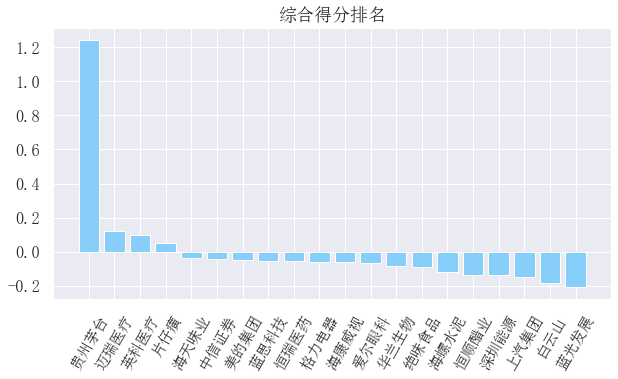

In [105]:
plt.figure(figsize=[10,5])
ax1=plt.subplot(111)
X=End_scores['名称']
Y=End_scores['综合得分']
plt.bar(X,Y,color="#87CEFA")
# plt.bar(X, Y, color="red")
plt.title('综合得分排名')
ax1.set_xticks(range(len(End_scores)))
ax1.set_xticklabels(End_scores['名称'],rotation=60,fontsize=15)
plt.savefig('img/综合得分排名.png',bbox_inches='tight',dpi=600)
plt.show()


迈瑞医疗    1.120490
片仔癀     2.077387
爱尔眼科    1.872828
贵州茅台    2.257684
恒瑞医药    0.777017
海天味业    1.497788
格力电器    0.820439
美的集团    1.752840
海螺水泥    0.076206
恒顺醋业    0.840860
绝味食品    1.135547
白云山    -0.256848
华兰生物    0.417324
深圳能源    2.214940
中信证券    0.419138
蓝光发展   -0.910538
海康威视    1.782966
英科医疗    2.508386
上汽集团    0.308346
蓝思科技    1.257474
dtype: float64
迈瑞医疗     0.864011
片仔癀      2.585365
爱尔眼科     2.983384
贵州茅台     3.578431
恒瑞医药     1.514051
海天味业     4.489355
格力电器     2.783996
美的集团    13.738462
海螺水泥     0.957063
恒顺醋业    31.579812
绝味食品    15.694033
白云山     -1.177796
华兰生物     2.286272
深圳能源     7.911070
中信证券     0.913691
蓝光发展    -1.168823
海康威视     2.414903
英科医疗     5.095862
上汽集团     0.233358
蓝思科技     0.917904
dtype: float64


<BarContainer object of 20 artists>

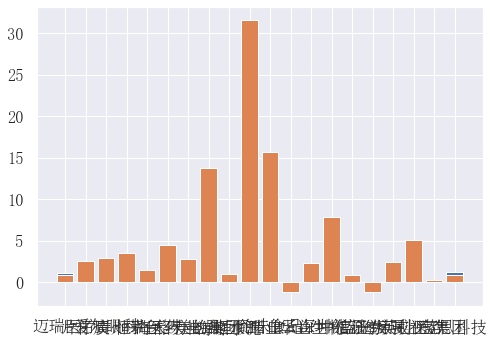

In [21]:
from RiskAdjustedReturnMetrics import *
import scipy.stats as stats
import statsmodels.stats.api as sms
# returns_all=StockReturns.copy()
stock_return=StockReturns.copy()
returns_all=stock_return.copy()
returns_mean = returns_all.mean()
# returns_mean = returns_all.sum()
#print(returns_mean)
# Risk free rate
f = 0.00
sharpe_ratio=sharpe_ratio(returns_mean*math.sqrt(len(returns_all)), returns_all, f/len(returns_all))
print(sharpe_ratio)
plt.bar(namelist,sharpe_ratio)
#sharpe_ratio.plot()
conditional_sharpe_ratio=conditional_sharpe_ratio(returns_mean*math.sqrt(len(returns_all)), returns_all, f/len(returns_all),0.1)
print(conditional_sharpe_ratio)
plt.bar(namelist,conditional_sharpe_ratio)
#conditional_sharpe_ratio.plot()
# sharpe_ratio_conditional_sharpe_ratio=

In [22]:
JB_pvalue_Skew_Kurt=pd.DataFrame()
JB_pvalue_Skew_Kurt['名称']=namelist
jarque_bera=sms.jarque_bera(returns_all)
# print('Jb统计量',jarque_bera)
# print(pd.DataFrame(np.array(jarque_bera).T))
JB_pvalue_Skew_Kurt[['JB统计量','P值','偏度','峰度']]=pd.DataFrame(np.array(jarque_bera).T)
JB_pvalue_Skew_Kurt.to_excel('JB_pvalue_Skew_Kurt.xlsx')

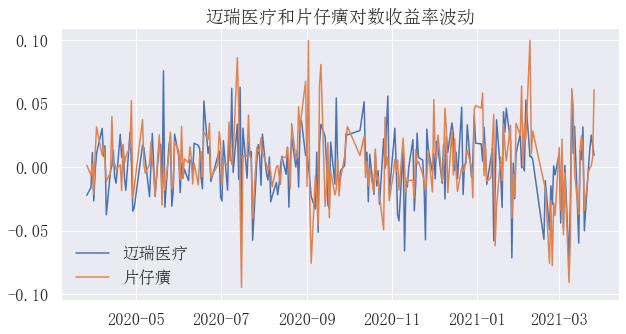

In [76]:
plt.figure(figsize=[10,5])
plt.plot(stock_return['迈瑞医疗'],label='迈瑞医疗')
plt.plot(stock_return['片仔癀'],label='片仔癀')
plt.title('迈瑞医疗和片仔癀对数收益率波动')
plt.legend()
plt.savefig('img/迈瑞医疗片仔癀对数收益率波动.png',bbox_inches='tight',dpi=600,pad_inches=0.0)

In [ ]:
# 设置组合权重，存储为numpy数组类型
portfolio_weights = np.random.dirichlet(np.ones(20),size=1)
print(portfolio_weights)
# 将收益率数据拷贝到新的变量 stock_return 中，这是为了后续调用的方便
stock_return = StockReturns.copy()
# 计算加权的股票收益
WeightedReturns = stock_return.mul(portfolio_weights, axis=1)
# 计算投资组合的收益
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)
# 绘制组合收益随时间变化的图
StockReturns.Portfolio.plot()
plt.show()

In [113]:
for name in tqdm(namelist):
    fig=plt.figure(figsize=[10,5])
    stats.probplot(stock_return[name], dist="norm",plot=plt)
    plt.title('%s收益率QQ图'%name)
    plt.savefig('img/%s收益率QQ图.png'%name,bbox_inches='tight',dpi=600,pad_inches=0.0)

In [ ]:
# 计算累积的组合收益，并绘图
CumulativeReturns = ((1+StockReturns["Portfolio"]).cumprod()-1)
CumulativeReturns.plot()
plt.title('随机组合收益')
plt.savefig('img/随机组合收益.png',bbox_inches='tight',dpi=600,pad_inches=0.0)

plt.show()

In [25]:
# 累积收益曲线绘制函数
def cumulative_returns_plot(name_list,title):
    for name in name_list:
        CumulativeReturns = ((1+StockReturns[name]).cumprod()-1)
        CumulativeReturns.plot(label=name)
    plt.legend()
    plt.title('多种权重下的组合收益')
    plt.savefig('img/%s.png'%title,bbox_inches='tight',dpi=600,pad_inches=0.0)
    plt.show()

20


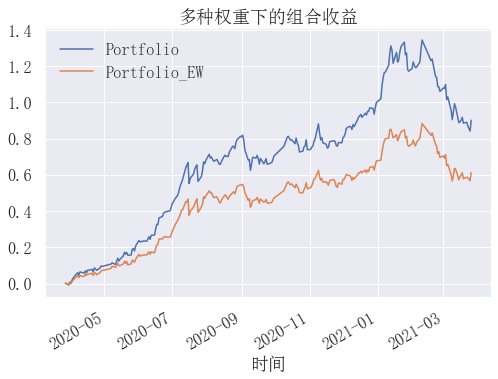

In [26]:
# 设置投资组合中股票的数目
numstocks = len(namelist)
print(numstocks)
# 平均分配每一项的权重
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)
# 计算等权重组合的收益
StockReturns['Portfolio_EW'] = stock_return.mul(portfolio_weights_ew, axis=1)  \
                                           .sum(axis=1)
# 绘制累积收益曲线
cumulative_returns_plot(['Portfolio', 'Portfolio_EW'],'Portfolio_EW')

In [27]:
print(len(stock_return))

243


          迈瑞医疗       片仔癀      爱尔眼科      贵州茅台      恒瑞医药      海天味业      格力电器  \
迈瑞医疗  1.000000  0.471916  0.576093  0.484146  0.605748  0.462023  0.147928   
片仔癀   0.471916  1.000000  0.539969  0.610793  0.427620  0.516533  0.190568   
爱尔眼科  0.576093  0.539969  1.000000  0.533575  0.520597  0.504371  0.238642   
贵州茅台  0.484146  0.610793  0.533575  1.000000  0.489747  0.526894  0.290725   
恒瑞医药  0.605748  0.427620  0.520597  0.489747  1.000000  0.495336  0.198967   
海天味业  0.462023  0.516533  0.504371  0.526894  0.495336  1.000000  0.154313   
格力电器  0.147928  0.190568  0.238642  0.290725  0.198967  0.154313  1.000000   
美的集团  0.394256  0.293915  0.392122  0.458450  0.381113  0.392739  0.542687   
海螺水泥  0.163279  0.161443  0.212951  0.231783  0.165955  0.179159  0.358093   
恒顺醋业  0.400828  0.475064  0.407165  0.497473  0.401549  0.603805  0.191349   
绝味食品  0.438456  0.401447  0.381295  0.362656  0.320005  0.441323  0.107725   
白云山   0.275692  0.268518  0.232642  0.273416  0.313444  0.215271

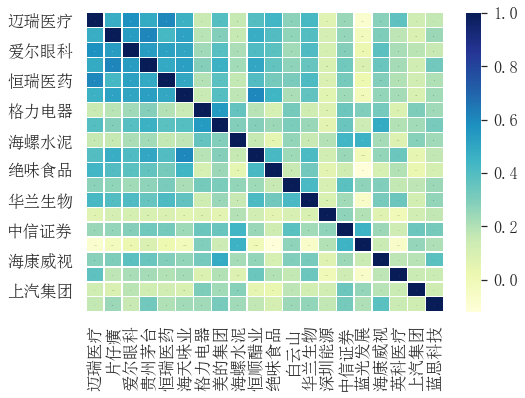

In [28]:
# 计算相关矩阵
correlation_matrix = stock_return.corr()

# 输出相关矩阵
print(correlation_matrix)

# 创建热图
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu",
            linewidths=0.3,
            annot_kws={"size": 1})

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig('img/20种股票相关矩阵.png',bbox_inches='tight',dpi=600,pad_inches=0.0)

plt.show()

In [29]:
# 计算协方差矩阵
cov_mat = stock_return.cov()

# 年化协方差矩阵
cov_mat_annual = cov_mat * len(stock_return)

# 输出协方差矩阵
print(cov_mat_annual)

# 计算投资组合的标准差
# portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T,
#                                       np.dot(cov_mat_annual, portfolio_weights)))
# print(portfolio_volatility)

          迈瑞医疗       片仔癀      爱尔眼科      贵州茅台      恒瑞医药      海天味业      格力电器  \
迈瑞医疗  0.160951  0.084210  0.103509  0.060544  0.076731  0.069049  0.017297   
片仔癀   0.084210  0.197835  0.107562  0.084682  0.060054  0.085585  0.024705   
爱尔眼科  0.103509  0.107562  0.200576  0.074487  0.073616  0.084147  0.031150   
贵州茅台  0.060544  0.084682  0.074487  0.097161  0.048200  0.061181  0.026412   
恒瑞医药  0.076731  0.060054  0.073616  0.048200  0.099692  0.058261  0.018310   
海天味业  0.069049  0.085585  0.084147  0.061181  0.058261  0.138771  0.016754   
格力电器  0.017297  0.024705  0.031150  0.026412  0.018310  0.016754  0.084949   
美的集团  0.055092  0.045534  0.061168  0.049774  0.041913  0.050959  0.055093   
海螺水泥  0.019028  0.020859  0.027703  0.020987  0.015221  0.019387  0.030317   
恒顺醋业  0.066820  0.087802  0.075773  0.064434  0.052683  0.093465  0.023174   
绝味食品  0.086742  0.088051  0.084209  0.055744  0.049825  0.081070  0.015483   
白云山   0.029810  0.032189  0.028081  0.022970  0.026673  0.021613

In [30]:
# 设置模拟的次数
number = 10000
# 设置空的numpy数组，用于存储每次模拟得到的权重、收益率和标准差
random_p = np.empty((number, numstocks+2))
# 设置随机数种子，这里是为了结果可重复
np.random.seed(123)

# 循环模拟10000次随机的投资组合
for i in range(number):
    # 生成9个随机数，并归一化，得到一组随机的权重数据
    randomnumstocks = np.random.random(numstocks)
    random_weight = randomnumstocks / np.sum(randomnumstocks)

    # 计算年化平均收益率
    mean_return = stock_return.mul(random_weight, axis=1).sum(axis=1).mean()
    annual_return = (1 + mean_return)**len(stock_return) - 1

    # 计算年化的标准差，也称为波动率
    random_volatility = np.sqrt(np.dot(random_weight,
                                       np.dot(cov_mat_annual, random_weight.T)))

    # 将上面生成的权重，和计算得到的收益率、标准差存入数组random_p中
    random_p[i][:numstocks] = random_weight
    random_p[i][numstocks] = annual_return
    random_p[i][numstocks+1] = random_volatility

# 将numpy数组转化成DataFrame数据框
RandomPortfolios = pd.DataFrame(random_p)
# 设置数据框RandomPortfolios每一列的名称
RandomPortfolios.columns = [ticker + "_weight" for ticker in namelist]  \
                         + ['Returns', 'Volatility']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


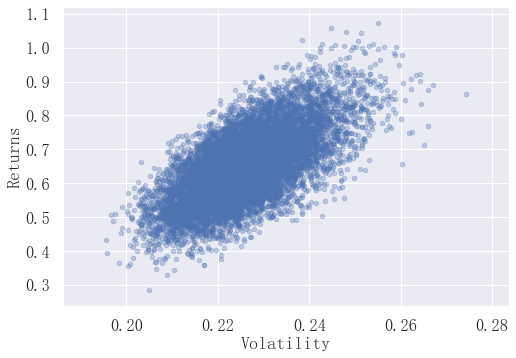

In [31]:
# 绘制散点图
RandomPortfolios.plot('Volatility', 'Returns', kind='scatter', alpha=0.3)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


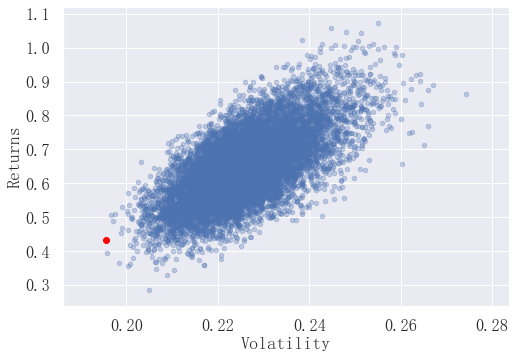

In [32]:
# 找到标准差最小数据的索引值
min_index = RandomPortfolios.Volatility.idxmin()

# 在收益-风险散点图中突出风险最小的点
RandomPortfolios.plot('Volatility', 'Returns', kind='scatter', alpha=0.3)
x = RandomPortfolios.loc[min_index,'Volatility']
y = RandomPortfolios.loc[min_index,'Returns']
plt.scatter(x, y, color='red')
plt.show()

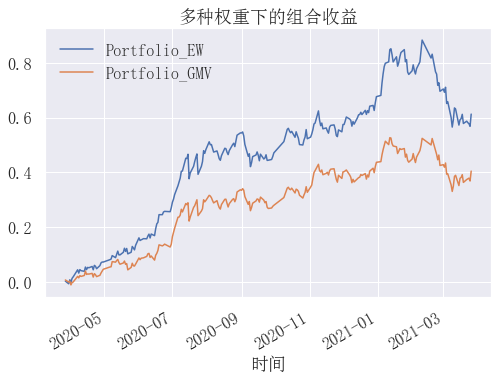

In [33]:
# 提取最小波动组合对应的权重, 并转换成Numpy数组
GMV_weights = np.array(RandomPortfolios.iloc[min_index, 0:numstocks])

# 计算GMV投资组合收益
StockReturns['Portfolio_GMV'] = stock_return.mul(GMV_weights, axis=1).sum(axis=1)

# 绘制累积收益曲线
cumulative_returns_plot(['Portfolio_EW', 'Portfolio_GMV'],title='EW_GMV')

In [34]:
# 设置无风险回报率为0
risk_free = 0

# 计算每项资产的夏普比率
RandomPortfolios['Sharpe'] = (RandomPortfolios.Returns - risk_free)   \
                            / RandomPortfolios.Volatility
# 找到夏普比率最大数据对应的索引值
max_index = RandomPortfolios.Sharpe.idxmax()
# print(RandomPortfolios.Sharpe)
# print(max_index)

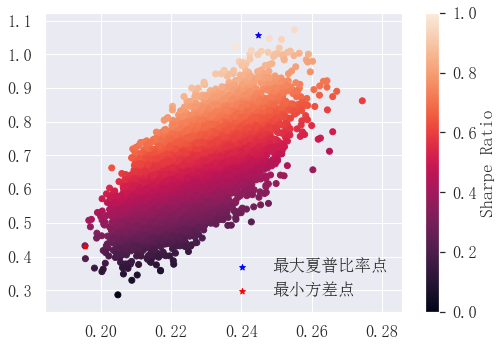

In [35]:
# 绘制收益-标准差的散点图，并用颜色描绘夏普比率
plt.scatter(RandomPortfolios.Volatility, RandomPortfolios.Returns,
            c=RandomPortfolios.Sharpe)
x = RandomPortfolios.loc[max_index,'Volatility']
y = RandomPortfolios.loc[max_index,'Returns']
plt.scatter(x, y, color='blue',marker='*',label='最大夏普比率点')
plt.colorbar(label='Sharpe Ratio')
x = RandomPortfolios.loc[min_index,'Volatility']
y = RandomPortfolios.loc[min_index,'Returns']
plt.scatter(x, y, color='red',marker='*',label='最小方差点')
plt.legend()
plt.savefig('img/夏普比率图.png',bbox_inches='tight',dpi=600,pad_inches=0.0)
plt.show()

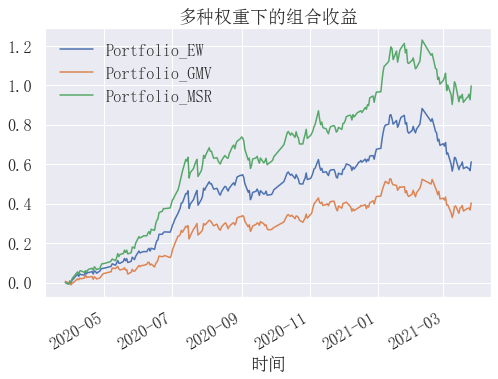

In [36]:
# 提取最大夏普比率组合对应的权重，并转化为numpy数组
MSR_weights = np.array(RandomPortfolios.iloc[max_index, 0:numstocks])

# 计算MSR组合的收益
StockReturns['Portfolio_MSR'] = stock_return.mul(MSR_weights, axis=1).sum(axis=1)

# 绘制累积收益曲线
cumulative_returns_plot(['Portfolio_EW',   \
                         'Portfolio_GMV', 'Portfolio_MSR'],'EW_GMV_MSR')

迈瑞医疗    0.448599
片仔癀     0.922090
爱尔眼科    0.837031
贵州茅台    0.702286
恒瑞医药    0.244830
海天味业    0.556805
格力电器    0.238632
美的集团    0.609274
海螺水泥    0.022091
恒顺醋业    0.348683
绝味食品    0.558812
白云山    -0.069082
华兰生物    0.217366
深圳能源    1.007128
中信证券    0.151452
蓝光发展   -0.272607
海康威视    0.747104
英科医疗    1.948344
上汽集团    0.119445
蓝思科技    0.725515
dtype: float64


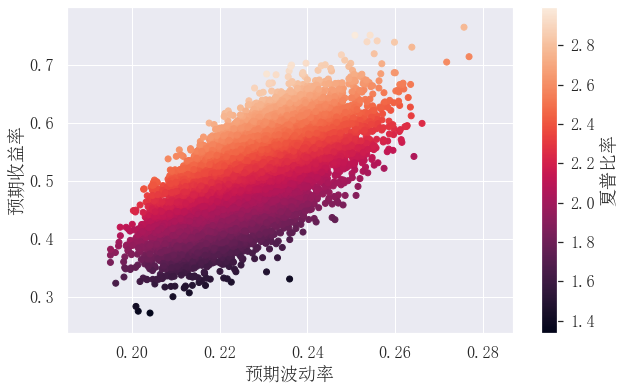

In [37]:
#计算股票收益率
log_returns=stock_return.copy()#.iloc[:,0:3]
print(log_returns.mean()*len(stock_return))
# print(log_returns)
##计算不同权重状态下的股票组合预期收益率和波动率，用于出不同权重状态下股票组合的收益波动分布图
number = 15000 #10000组权重
stock_num=20#股票数量
weights=np.random.rand(number, stock_num)
weights/=np.sum(weights, axis = 1).reshape(number,1) #注意这里一定要加reshape，使得除数的size属性完备
# mean_return = log_returns.mul(weights.T).sum(axis=1).mean()
# pret = (1 + mean_return)**252 - 1
pret=np.dot(weights, log_returns.mean())*len(stock_return)#股票组合的预期年化收益率
pvol=np.diag(np.sqrt(np.dot(weights,np.dot(log_returns.cov()*len(stock_return),weights.T))))#股票组合的预期年化波动率

plt.figure(figsize=(10,6))
plt.scatter(pvol,pret,c=pret/pvol,marker='o')
plt.xlabel('预期波动率')
plt.ylabel('预期收益率')
plt.grid(True)
plt.colorbar(label='夏普比率')

[0.    0.117 0.008 0.178 0.    0.    0.    0.077 0.    0.    0.    0.
 0.    0.323 0.    0.    0.105 0.191 0.    0.   ]
[1.06357464 0.27993493 3.79936375]
[0.001 0.    0.    0.066 0.114 0.046 0.122 0.    0.092 0.    0.053 0.178
 0.    0.072 0.    0.185 0.002 0.007 0.062 0.   ]
[0.1929077  0.17621761 1.09471293]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.94834443 0.77833558 2.50321903]


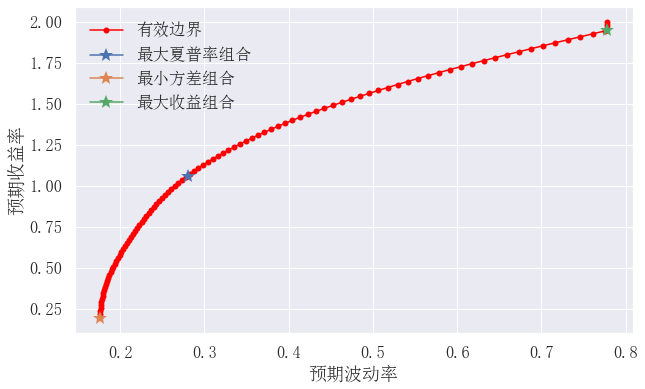

In [38]:
##优化计算
import scipy.optimize as sco
##编写目标变量的计算函数（3个） 用于之后求解夏普率最大化，风险最小化，收益最大化的目标组合
def statistics(weights):
    weights=np.array(weights)
    pret=np.dot(weights, log_returns.mean())*len(stock_return)#股票组合的预期年化收益率
    pvol=np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*len(stock_return),weights)))#股票组合的预期年化波动率
    return np.array([pret, pvol, pret/pvol])

 ###求解夏普率最大的组合权重
 ###定义最大化SharpRatio的目标函数
def min_neg_sharp(weights):
    return -1*statistics(weights)[2]

#编写优化的约束条件,minimize函数的约定表达如下
cons=({'type':'eq','fun': lambda x: np.sum(x)-1})#约束是所有参数(权重)的总和为1。
bnd=tuple((0,1) for i in range(stock_num))##我们还将参数值(权重)限制在0和1之间。这些值以多个元组组成的一个元组形式提供给最小化函数

#调用minimize函数进行最优化求解
opts_maxSharpRatio = sco.minimize(min_neg_sharp, stock_num*[1/stock_num], method='SLSQP', bounds=bnd, constraints=cons)#  N*[1/N]表示复制N个一维list #'SLSQP'表示Sequential Least SQuares Programming序贯最小二乘规划
print(opts_maxSharpRatio['x'].round(3))#求得优化后组合的权重
print(statistics(opts_maxSharpRatio['x'])) #优化后组合的预期收益率，预期波动率，及SharpRatio


##求解波动率最小化的组合权重
#定义目标函数
def min_vol(weights):
    return statistics(weights)[1]

opts_minVolatility = sco.minimize(min_vol, stock_num*[1/stock_num], method='SLSQP',bounds=bnd, constraints=cons)
print(opts_minVolatility['x'].round(3))
print(statistics(opts_minVolatility['x']))



##求解最大预期收益的组合权重
def min_neg_pret(weights):
    return -statistics(weights)[0]
opts_maxReturn=sco.minimize(min_neg_pret, stock_num*[1/stock_num], method='SLSQP', bounds=bnd, constraints=cons)
print(opts_maxReturn['x'].round(3))
print(statistics(opts_maxReturn['x']))

##构建有效边界组合
trets=np.linspace(0.2,2.0,100)
tvols=[]

for trets_i in trets:
    cons1=({'type':'eq','fun': lambda x: np.sum(x)-1},{'type':'eq','fun': lambda x: statistics(x)[0]-trets_i})#约束是所有参数(权重)的总和为1,且预期收益等于目标收益
    res=sco.minimize(min_vol,stock_num*[1/stock_num], method='SLSQP', bounds=bnd, constraints=cons1)
    tvols.append(res['fun'])
tvols=np.array(tvols)

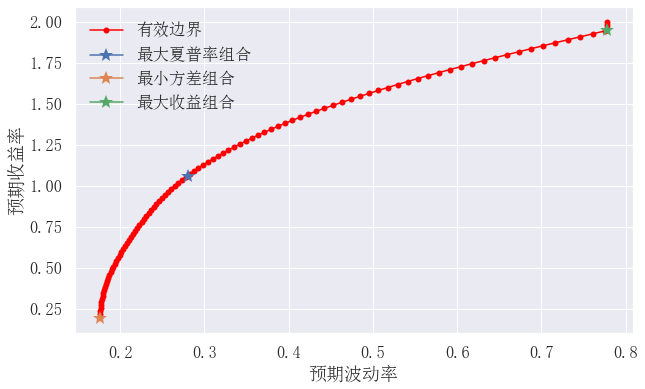

In [53]:
##作图
plt.figure(figsize=(10,6))
# plt.scatter(pvol, pret, marker='o', c=pret/pvol)
plt.plot(tvols, trets,marker='o',c='red', label='有效边界')
plt.plot(statistics(opts_maxSharpRatio['x'])[1],statistics(opts_maxSharpRatio['x'])[0],marker='*',markersize=15,label='最大夏普率组合')
plt.plot(statistics(opts_minVolatility['x'])[1],statistics(opts_minVolatility['x'])[0],marker='*',markersize=15,label='最小方差组合')
plt.plot(statistics(opts_maxReturn['x'])[1],statistics(opts_maxReturn['x'])[0],marker='*',markersize=15,label='最大收益组合')
plt.grid(True)
# plt.colorbar(label='夏普率')
plt.xlabel('预期波动率')
plt.ylabel('预期收益率')
plt.legend()
plt.savefig('img/mean-方差模型有效边界.png',bbox_inches='tight',dpi=600,pad_inches=0.0)



In [39]:
WeightTable = pd.DataFrame()
WeightTable['名称']=namelist.append(pd.Series(['预期收益率','预期波动率','SharpRatio']),ignore_index=True)

# print(WeightTable['名称'])
# print(opts_minVolatility['x'].round(3)+statistics(opts_minVolatility['x']))
WeightTable['最小方差'] = np.append(opts_minVolatility['x'].round(3),statistics(opts_minVolatility['x']))
WeightTable['最大预期收益'] = np.append(opts_maxReturn['x'].round(3),statistics(opts_maxReturn['x']))
WeightTable['最大SharpRatio'] = np.append(opts_maxSharpRatio['x'].round(3),statistics(opts_maxSharpRatio['x']))
print(WeightTable)
WeightTable.to_excel('WeightTable.xlsx')

            名称      最小方差    最大预期收益  最大SharpRatio
0         迈瑞医疗  0.001000  0.000000      0.000000
1          片仔癀  0.000000  0.000000      0.117000
2         爱尔眼科  0.000000  0.000000      0.008000
3         贵州茅台  0.066000  0.000000      0.178000
4         恒瑞医药  0.114000  0.000000      0.000000
5         海天味业  0.046000  0.000000      0.000000
6         格力电器  0.122000  0.000000      0.000000
7         美的集团  0.000000  0.000000      0.077000
8         海螺水泥  0.092000  0.000000      0.000000
9         恒顺醋业  0.000000  0.000000      0.000000
10        绝味食品  0.053000  0.000000      0.000000
11         白云山  0.178000  0.000000      0.000000
12        华兰生物  0.000000  0.000000      0.000000
13        深圳能源  0.072000  0.000000      0.323000
14        中信证券  0.000000  0.000000      0.000000
15        蓝光发展  0.185000  0.000000      0.000000
16        海康威视  0.002000  0.000000      0.105000
17        英科医疗  0.007000  1.000000      0.191000
18        上汽集团  0.062000  0.000000      0.000000
19        蓝思科技  0.00

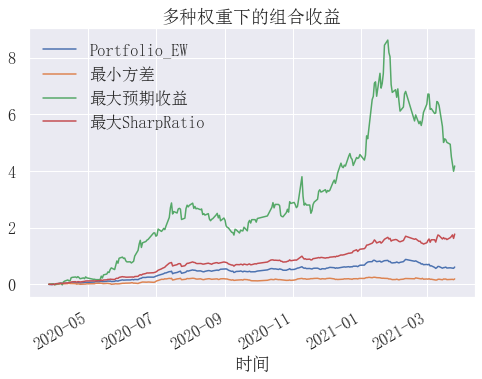

In [40]:
StockReturns['最小方差'] = stock_return.mul(opts_minVolatility['x'].round(3), axis=1).sum(axis=1)
StockReturns['最大预期收益'] = stock_return.mul(opts_maxReturn['x'].round(3), axis=1).sum(axis=1)
StockReturns['最大SharpRatio'] = stock_return.mul(opts_maxSharpRatio['x'].round(3), axis=1).sum(axis=1)
cumulative_returns_plot(['Portfolio_EW', '最小方差',  \
                         '最大预期收益', '最大SharpRatio'],'最小方差最大预期收益最大SharpRatio')

In [41]:
import pulp
from pandas_datareader import data
def PortfolioRiskTarget(mu, scen, CVaR_target=1, lamb=1, max_weight=1, min_weight=None, cvar_alpha=0.05):
    i_idx = mu.index
    j_idx = scen.index

    # number of scenarios
    N = scen.shape[0]

    # define variables
    x = pulp.LpVariable.dicts("x", ((i) for i in i_idx),
                              lowBound=0,
                              cat='Continuous')

    # loss deviation
    VarDev = pulp.LpVariable.dicts("VarDev", ((t) for t in j_idx),
                                   lowBound=0,
                                   cat='Continuous')

    # value at risk
    VaR = pulp.LpVariable("VaR", lowBound=0,
                          cat='Continuous')
    CVaR = pulp.LpVariable("CVaR", lowBound=0,
                           cat='Continuous')

    # binary variable connected to cardinality constraints
    b_z = pulp.LpVariable.dicts("b_z", ((i) for i in i_idx),
                                cat='Binary')

    #####################################
    ## define model
    model = pulp.LpProblem("Mean-CVaR Optimization", pulp.LpMaximize)

    #####################################
    ## Objective Function

    model += lamb * (pulp.lpSum([mu[i] * x[i] for i in i_idx])) - (1 - lamb) * CVaR

    #####################################
    # constraint

    # calculate CVaR
    for t in j_idx:
        model += -pulp.lpSum([scen.loc[t, i] * x[i] for i in i_idx]) - VaR <= VarDev[t]

    model += VaR + 1 / (N * cvar_alpha) * pulp.lpSum([VarDev[t] for t in j_idx]) == CVaR

    model += CVaR <= CVaR_target

    ### price*number of products cannot exceed budget
    model += pulp.lpSum([x[i] for i in i_idx]) == 1

    ### Concentration limits
    # set max limits so it cannot not be larger than a fixed value
    ###
    for i in i_idx:
        model += x[i] <= max_weight

    ### Add minimum weight constraint, either zero or atleast minimum weight
    if min_weight is not None:

        for i in i_idx:
            model += x[i] >= min_weight * b_z[i]
            model += x[i] <= b_z[i]

    # solve model
    model.solve()

    # print an error if the model is not optimal
    if pulp.LpStatus[model.status] != 'Optimal':
        print("Whoops! There is an error! The model has error status:" + pulp.LpStatus[model.status])

    # Get positions
    if pulp.LpStatus[model.status] == 'Optimal':

        # print variables
        var_model = dict()
        for variable in model.variables():
            var_model[variable.name] = variable.varValue

        # solution with variable names
        var_model = pd.Series(var_model, index=var_model.keys())

        long_pos = [i for i in var_model.keys() if i.startswith("x")]

        # total portfolio with negative values as short positions
        port_total = pd.Series(var_model[long_pos].values, index=[t[2:] for t in var_model[long_pos].index])

        opt_port = port_total

    # set flooting data points to zero and normalize
    opt_port[opt_port < 0.000001] = 0
    opt_port = opt_port / sum(opt_port)

    # return portfolio, CVaR, and alpha
    return opt_port, var_model["CVaR"], sum(mu * port_total)


def PortfolioLambda(mu, scen, max_weight=1, min_weight=None, cvar_alpha=0.05, ft_points=15):
    # asset names
    assets = mu.index

    # column names
    col_names = mu.index.values.tolist()
    col_names.extend(["Mu", "CVaR", "STAR"])
    # number of frontier points

    # store portfolios
    portfolio_ft = pd.DataFrame(columns=col_names, index=list(range(ft_points)))

    # maximum risk portfolio
    lamb = 0.99999
    max_risk_port, max_risk_CVaR, max_risk_mu = PortfolioRiskTarget(mu=mu, scen=scen, CVaR_target=100, lamb=lamb,
                                                                    max_weight=max_weight, min_weight=min_weight,
                                                                    cvar_alpha=cvar_alpha)
    portfolio_ft.loc[ft_points - 1, assets] = max_risk_port
    portfolio_ft.loc[ft_points - 1, "Mu"] = max_risk_mu
    portfolio_ft.loc[ft_points - 1, "CVaR"] = max_risk_CVaR
    portfolio_ft.loc[ft_points - 1, "STAR"] = max_risk_mu / max_risk_CVaR

    # minimum risk portfolio
    lamb = 0.00001
    min_risk_port, min_risk_CVaR, min_risk_mu = PortfolioRiskTarget(mu=mu, scen=scen, CVaR_target=100, lamb=lamb,
                                                                    max_weight=max_weight, min_weight=min_weight,
                                                                    cvar_alpha=cvar_alpha)
    portfolio_ft.loc[0, assets] = min_risk_port
    portfolio_ft.loc[0, "Mu"] = min_risk_mu
    portfolio_ft.loc[0, "CVaR"] = min_risk_CVaR
    portfolio_ft.loc[0, "STAR"] = min_risk_mu / min_risk_CVaR

    # CVaR step size
    step_size = (max_risk_CVaR - min_risk_CVaR) / ft_points  # CVaR step size

    # calculate all frontier portfolios
    for i in range(1, ft_points - 1):
        CVaR_target = min_risk_CVaR + step_size * i
        i_risk_port, i_risk_CVaR, i_risk_mu = PortfolioRiskTarget(mu=mu, scen=scen, CVaR_target=CVaR_target, lamb=1,
                                                                  max_weight=max_weight, min_weight=min_weight,
                                                                  cvar_alpha=cvar_alpha)
        portfolio_ft.loc[i, assets] = i_risk_port
        portfolio_ft.loc[i, "Mu"] = i_risk_mu
        portfolio_ft.loc[i, "CVaR"] = i_risk_CVaR
        portfolio_ft.loc[i, "STAR"] = i_risk_mu / i_risk_CVaR
    portfolio_ft["Mu"] = portfolio_ft["Mu"]*len(scen)
    portfolio_ft["STAR"] = portfolio_ft["STAR"]*len(scen)
    return portfolio_ft

In [42]:
from RiskAdjustedReturnMetrics import var,cvar
returns=stock_return.copy()
# print(returns.std())
# print(var(returns,0.05))
# print(cvar(returns,0.05))

mu = returns.mean()
scen = returns
print(len(scen))

243


In [43]:
min_weight = 0

F:\anaconda\lib\site-packages\pulp\pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
F:\anaconda\lib\site-packages\pulp\pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
F:\anaconda\lib\site-packages\pulp\pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


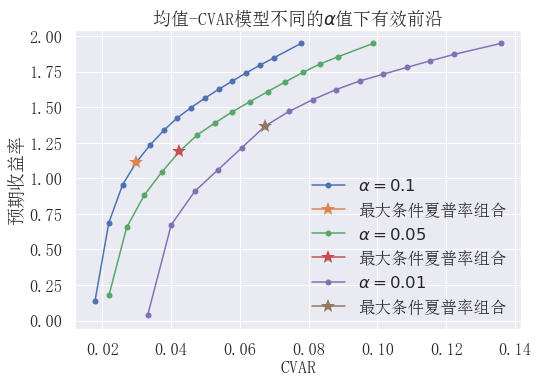

In [44]:
# plt.figure(figsize=(10,6))
WeightTable_CVAR=pd.DataFrame()
WeightTable_CVAR['名称']=namelist.append(pd.Series(['Mu','CVaR','STAR']),ignore_index=True)

for i,cvar_alpha in enumerate([0.1,0.05,0.01]):
    Frontier_port = PortfolioLambda(mu=mu, scen=scen,max_weight=1,min_weight=None,cvar_alpha=cvar_alpha)
    Frontier_port=Frontier_port.astype('float')
    Frontier_port.to_excel('CVAR组合_alpha_%s.xlsx'%cvar_alpha)
    max_index = Frontier_port.STAR.idxmax()
    best = Frontier_port.iloc[max_index,:].values
    WeightTable_CVAR['alpha%s'%cvar_alpha]=best
    StockReturns['均值-CVAR模型 alpha=%s'%cvar_alpha] = stock_return.mul(best[0:20], axis=1).sum(axis=1)
    best_y=Frontier_port.loc[max_index,"Mu"]
    best_x=Frontier_port.loc[max_index,"CVaR"]
    plt.plot(Frontier_port['CVaR'],Frontier_port['Mu'],marker='o', label=r'$\alpha=%s$'%cvar_alpha)
    plt.plot(best_x,best_y,marker='*',markersize=15,label='最大条件夏普率组合')

plt.legend()
plt.xlabel('CVAR')
plt.ylabel('预期收益率')
plt.title(r'均值-CVAR模型不同的$\alpha$值下有效前沿')
plt.grid(True)
plt.savefig('img/均值-CVAR模型不同的alpha值下有效前沿.png',bbox_inches='tight',dpi=600,pad_inches=0.0)
# plt.colorbar(label='条件夏普比率')

In [45]:
print(WeightTable_CVAR)
WeightTable_CVAR.to_excel('WeightTable_CVAR.xlsx')

      名称   alpha0.1  alpha0.05  alpha0.01
0   迈瑞医疗   0.000000   0.000000   0.000000
1    片仔癀   0.083539   0.169902   0.000000
2   爱尔眼科   0.000000   0.000000   0.000000
3   贵州茅台   0.171504   0.057574   0.000000
4   恒瑞医药   0.000000   0.000000   0.000000
5   海天味业   0.000000   0.000000   0.000000
6   格力电器   0.000000   0.000000   0.000000
7   美的集团   0.000000   0.000000   0.000000
8   海螺水泥   0.000000   0.000000   0.000000
9   恒顺醋业   0.000000   0.000000   0.000000
10  绝味食品   0.000000   0.023812   0.000000
11   白云山   0.000000   0.000000   0.000000
12  华兰生物   0.000000   0.000000   0.000000
13  深圳能源   0.570118   0.462689   0.394869
14  中信证券   0.000000   0.000000   0.000000
15  蓝光发展   0.000000   0.000000   0.000000
16  海康威视   0.000000   0.037305   0.173026
17  英科医疗   0.174839   0.248717   0.432105
18  上汽集团   0.000000   0.000000   0.000000
19  蓝思科技   0.000000   0.000000   0.000000
20    Mu   1.112304   1.188850   1.368842
21  CVaR   0.029850   0.042420   0.067405
22  STAR  37.263608  28.025553  20

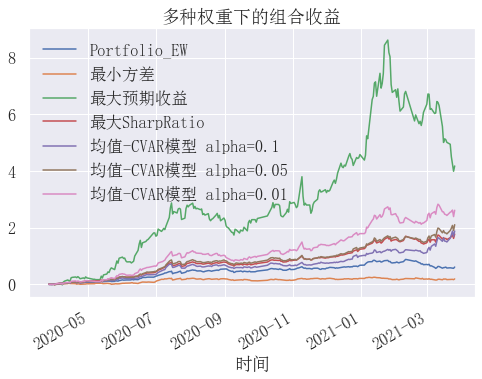

In [46]:
cumulative_returns_plot(['Portfolio_EW', '最小方差',  \
                         '最大预期收益', '最大SharpRatio','均值-CVAR模型 alpha=0.1',\
                         '均值-CVAR模型 alpha=0.05','均值-CVAR模型 alpha=0.01'],\
                        '最小方差最大预期收益最大SharpRatio_CVAR')